<div style="text-align: center;">
<h1>–†–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö 2/2</h1>
</div>

<div style="text-align: right;">
<h4>–î–∞—Ç–∞—Å–µ—Ç Avito ML CUP 2025 &nbsp;&nbsp;&nbsp;&nbsp;</h4>
</div>

## –ò–º–ø–æ—Ä—Ç—ã, –∫–æ–Ω—Å—Ç–∞–Ω—Ç—ã

In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import random
from natasha import Doc, MorphVocab, Segmenter, NewsEmbedding, NewsMorphTagger
from collections import Counter
import matplotlib.image as mpimg
import torch
from wordcloud import WordCloud

In [2]:
DATASET_PATH = '/workspace/AAA_project/data/mlcup_dataset'

IMAGES = os.path.join(DATASET_PATH, 'images')
META = os.path.join(DATASET_PATH, 'meta_info.csv')

In [3]:
RANDOM_STATE = 42

In [4]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

if DEVICE == 'cuda':
    print('Using GPU')
else:
    print('T_T Using CPU')

Using GPU


In [5]:
def display_ad(row: pd.Series, columns_to_display=None) -> None:
    '''
    –§—É–Ω–∫—Ü–∏—è, –≤—ã–≤–æ–¥—è—â–∞—è –æ–±—ä—è–≤–ª–µ–Ω–∏–µ, –µ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –ø—Ä–∏–∑–Ω–∞–∫–∏
    
    Parameters
    ----------
    row : pd.Series
        –°—Ç—Ä–æ–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞, —Å–æ–¥–µ—Ä–∂–∞—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ–± –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –∏ –µ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
    columns_to_display : list, optional
        –°–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –≤—ã–≤–µ—Å—Ç–∏. –ï—Å–ª–∏ None, –≤—ã–≤–æ–¥—è—Ç—Å—è –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    '''
    
    item_id = row['item_id']
    images = row['images']
    if isinstance(images, str):
        images = eval(images)
    
    fig, axes = plt.subplots(1, min(len(images), 9), figsize=(15, 5))
    if len(images) == 1:
        axes = [axes]
    
    for ax, image_id in zip(axes, images[:9]):
        image_path = os.path.join(IMAGES, f"{image_id}.jpg")
        if os.path.exists(image_path):
            img = mpimg.imread(image_path)
            ax.imshow(img)
            ax.set_title(f"{image_id}.jpg", fontsize=8)
            ax.axis('off')
        else:
            ax.set_title("–ö–∞—Ä—Ç–∏–Ω–∫–∏ –Ω–µ –Ω–∞–π–¥–µ–Ω—ã", fontsize=8)
            ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    if columns_to_display is None:
        columns_to_display = row.index.tolist()
    
    for col in columns_to_display:
        if col in row:
            print(f"{col}: {row[col]}")

## –û–ø–∏—Å–∞–Ω–∏–µ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö

–î–ª—è –Ω–∞—á–∞–ª–∞ –∑–∞–≥—Ä—É–∑–∏–º –æ—Å–Ω–æ–≤–Ω–æ–π –¥–∞—Ç–∞—Å–µ—Ç

In [11]:
df = pd.read_csv(META)
df = df.drop('source_chunk', axis=1)

df

item_id  \
0        13ade32c3e614d939faad4ab68350bc52ce8848b7a64bd...   
1        087e7f3dbec9326532f9fc784b68de294cb2d905d33bdf...   
2        5d81d4230671ed22e40ab9e05bb63fef5ad6766454714a...   
3        eff6d2ef2c44dc7361d389d3a9ce243e6e3079675c0b27...   
4        d0b78018657dff01508954bb58d4f03f1ddf11525d8d26...   
...                                                    ...   
2363441  df8639de905b0f981444b0bfbb0a92456f87a8d4252cfe...   
2363442  f70daefaf270b94174f01e5aab5b1d7d28cde06afc0dc3...   
2363443  21f2388144a74d7c22e7c16b494dbe229a3656d3d85911...   
2363444  bf4eb0b9be1d734dd95afbdf48ead5f78cb195ddacc0f6...   
2363445  eae31a88d737230014931d80a6d5c876dc47aa35bca233...   

                                                     title  \
0                                      –ó–∏–º–Ω–∏–µ –±–æ—Ç–∏–Ω–∫–∏ ecco   
1                               –ö–∏–≥—Ép—É–º–º–∏–∏ –º—ã—à–∫a inextenso   
2                                   –®—Ça–Ω—ã –¥–ª—è –¥–µ–≤–æ—á–∫–∏ zara   
3                                       –†—É–±a—à–∫a acoola 152   
4                                 –ö—Ép—Ç–∫a –∑–∏–º–Ω—è—è –∏ –≤–µ—Çp–æ–≤–∫a   
...                                                    ...   
2363441                     –†–µ–∑–µ—Ü –∫p—É–≥–ª—ã–π c–∫a–ª—å–Ω—ã–π 22 –∏ –¥p   
2363442                  –¢p—É–±—ã –±–µ—Ç–æ–Ω–æ–ª–∏—Ç–Ω—ã–µ –≤–ø—Ç 245 219 –º–º   
2363443           –≠–ªac—Ç–æ–º–µp—ã –¥–ª—è –≤–∏–±p–æ–ø–æ–≥p—É–∂a—Ç–µ–ª–µ–π Ice 815   
2363444  –ùac–æc —à–ªa–º–æ–≤—ã–π –≥–æp–∏–∑–æ–Ω—Ça–ª—å–Ω—ã–π –Ω–æ–≤—ã–π Toyo VH15HF-7   
2363445  –£c—Ça–Ω–æ–≤–∫–∏ –¥–ª—è –∑a–±–∏–≤a–Ω–∏—è –º–∏–∫p–æc–≤a–π –∏ –¥–æp–æ–∂–Ω—ã—Ö –æ–ø–æp   

                                               description  \
0        –±–æ—Ç–∏–Ω–∫–∏ —ç–∫–∫–æ,—É–Ω–∏c–µ–∫c,–∑–∏–º–Ω–∏–µ\n–Ω–æc–∏–ª–∏c—å –æ–¥–∏–Ω c–µ–∑...   
1                                                        .   
2                              —à—Ça–Ω—ã –Ω–æ–≤—ã–µ,–Ω–æc–∏–ª–∏ –øap—É pa–∑   
3                                          –Ω–æ–≤a—è,–Ω–µ –Ω–æc–∏–ª–∏   
4        –∑–∏–º–Ω—é—é –∫—Ép—Ç–∫—É –Ω–æc–∏–ª–∏ –º–µ–Ω—å—à–µ c–µ–∑–æ–Ωa,–ø–æ—á—Ç–∏ –Ω–æ–≤a—è...   
...                                                    ...   
2363441  –üp–æ–¥a–µ–º c–æ c–∫–ªa–¥a –≤ <ADDRESS-#0> pac—Ö–æ–¥–Ω–∏–∫–∏ –¥–ª...   
2363442  –≤ –Ωa–ª–∏—á–∏–∏ –Ω–æ–≤—ã–µ –±–µ—Ç–æ–Ω–æ–ª–∏—Ç–Ω—ã–µ —Çp—É–±—ã 219 –∏ 245 –º...   
2363443  –≠–ªac—Ç–æ–º–µp—ã –¥–ª—è –≤–∏–±p–æ–ø–æ–≥p—É–∂a—Ç–µ–ª–µ–π ICE 815 –Ω–æ–≤—ã–µ...   
2363444  –Ø–ø–æ–Ωc–∫–∏–π –º–æ—â–Ω—ã–π —à–ªa–º–æ–≤—ã–π –Ωac–æc –±–µ–∑ –Ωapa–±–æ—Ç–∫–∏, ...   
2363445  –£c—Ça–Ω–æ–≤–∫–∏ —è–≤–ª—è—é—Çc—è a–Ωa–ª–æ–≥–æ–º —Ç–µ—Ö–Ω–∏–∫–∏ Orteco –∏ G...   

                                                     attrs  \
0        {"178": 758, "179": 768, "2756": 19916, "2827"...   
1        {"178": 758, "179": 764, "2756": 19916, "2827"...   
2        {"178": 758, "179": 761, "2756": 19916, "2827"...   
3        {"178": 758, "179": 3266275, "2756": 19916, "2...   
4        {"178": 758, "179": 762, "2756": 19916, "2827"...   
...                                                    ...   
2363441  {"181": 5119, "110064": [315040], "110408": 43...   
2363442  {"181": 795, "110064": [315040], "110408": 431...   
2363443  {"181": 795, "110064": [315040], "110408": 431...   
2363444  {"181": 795, "110064": [315040], "110408": 431...   
2363445  {"181": 5119, "110064": [315040], "110408": 43...   

                              category  \
0                          –õ–∏—á–Ω—ã–µ –≤–µ—â–∏   
1                          –õ–∏—á–Ω—ã–µ –≤–µ—â–∏   
2                          –õ–∏—á–Ω—ã–µ –≤–µ—â–∏   
3                          –õ–∏—á–Ω—ã–µ –≤–µ—â–∏   
4                          –õ–∏—á–Ω—ã–µ –≤–µ—â–∏   
...                                ...   
2363441  –ì–æ—Ç–æ–≤—ã–π –±–∏–∑–Ω–µ—Å –∏ –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ   
2363442  –ì–æ—Ç–æ–≤—ã–π –±–∏–∑–Ω–µ—Å –∏ –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ   
2363443  –ì–æ—Ç–æ–≤—ã–π –±–∏–∑–Ω–µ—Å –∏ –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ   
2363444  –ì–æ—Ç–æ–≤—ã–π –±–∏–∑–Ω–µ—Å –∏ –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ   
2363445  –ì–æ—Ç–æ–≤—ã–π –±–∏–∑–Ω–µ—

In [12]:
print(f'–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–∞—Ç–∞—Å–µ—Ç–∞: {df.shape}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: {df.isnull().sum().sum()}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: {df.duplicated().sum()}')
print(f'–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö item_id: {df["item_id"].nunique()}/{df.shape[0]}')

–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–∞—Ç–∞—Å–µ—Ç–∞: (2363446, 6)
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 17
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: 0
–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö item_id: 2363446/2363446


In [13]:
print('–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö:')
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f'{col}: {df[col].isnull().sum()}')

–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö:
description: 4
attrs: 2
category: 7
images: 4


In [14]:
df.dropna(subset=['description', 'attrs', 'images'], inplace=True)

In [15]:
print('–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö:')
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f'{col}: {df[col].isnull().sum()}')

–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö:
category: 5


–ü–æ–∑–Ω–∞–∫–æ–º–∏–º—Å—è —Å –µ–≥–æ —Å—Ç—Ä—É–∫—Ç—É—Ä–æ–π –∏ —Ç–∏–ø–∞–º–∏ –¥–∞–Ω–Ω—ã—Ö

–î–∞—Ç–∞—Å–µ—Ç —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 6 –∫–æ–ª–æ–Ω–æ–∫:


| –ù–∞–∑–≤–∞–Ω–∏–µ –∫–æ–ª–æ–Ω–∫–∏      | –û–ø–∏—Å–∞–Ω–∏–µ                        | –¢–∏–ø –¥–∞–Ω–Ω—ã—Ö | –ü—Ä–∏–º–µ—Ä—ã –∑–Ω–∞—á–µ–Ω–∏–π                                          |
|-----------------------|---------------------------------|------------|-----------------------------------------------------------|
| `item_id`             | –£–Ω–∏–∫–∞–ª—å–Ω—ã–π –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∑–∞–ø–∏—Å–∏ | int64      | 1448c70b8b8784992e945ed50cbddcb80b47fbbec54b5b0d9aab2d955484953a5        |
| `title`               | –ù–∞–∑–≤–∞–Ω–∏–µ –æ–±—ä—è–≤–ª–µ–Ω–∏—è             | object     | '–ö—Ä–æ—Å—Å–æ–≤–∫–∏ Nike', '–ü–ª–∞—Ç—å–µ Zara', ...                      |
| `description`         | –û–ø–∏—Å–∞–Ω–∏–µ –æ–±—ä—è–≤–ª–µ–Ω–∏—è             | object     | '–ü—Ä–æ–¥–∞—é –∫–µ–¥—ã –∞–¥–∏–¥–∞—Å, –æ—Ä–∏–≥–∏–Ω–∞–ª, –ø–æ–∫—É–ø–∞–ª–∏—Å—å –≤ –æ—Ñ–ª–∞–π–Ω –º–∞–≥–∞–∑–∏–Ω–µ –≤ —ç–º–∏—Ä–∞—Ç–∞—Ö. –î–ª–∏–Ω–∞ –ø–æ —Å—Ç–µ–ª—å–∫–µ 17,5 —Å–º. –û–¥–µ–≤–∞–ª–∏—Å—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑. –í —Ö–æ—Ä–æ—à–µ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏.', '–°–æ—Å—Ç–æ—è–Ω–∏–µ –æ—Ç–ª–∏—á–Ω–æ–µ, –¥–µ—Ñ–µ–∫—Ç –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π –Ω–∞ —Ñ–æ—Ç–æ-–∑–∞–∫–ª–µ–ø–∫–∞ –ø–æ—Ç–µ—Ä—Ç–∞ —Å –æ–±–µ–∏—Ö —Å—Ç–æ—Ä–æ–Ω, –∫–æ–º–ø–µ–Ω—Å–∏—Ä—É—é –ø–∞—Ä–æ–π –¥–∂–∏–±–∏—Ç—Å–æ–≤. \n–ü–µ—Ä–µ—Å—ã–ª–∞—é! \n–û—Ä–∏–≥–∏–Ω–∞–ª!!!' |
| `attrs`               | –ê—Ç—Ä–∏–±—É—Ç—ã –æ–±—ä—è–≤–ª–µ–Ω–∏—è             | object     | "{"483": 6581, "631": 6641, "2823": 20020, "110064": [1121437], "110396": 431244, "160625": 18665219, "160635": 18668288}" |
| `images`              | –ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –æ–±—ä—è–≤–ª–µ–Ω–∏—è          | object     | ["822a2da3b63b6040fa6c69b99b99143840a6e52321d45b880aa45be3b2dfd40d"] |
| `category`            | –ö–∞—Ç–µ–≥–æ—Ä–∏—è –æ–±—ä—è–≤–ª–µ–Ω–∏—è            | object     | –≠–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞ |


In [26]:
random_row = df.sample(1).iloc[0]
print(f"item_id: {random_row['item_id']}")
print(f'title: {random_row['title']}')
print(f"description: {random_row['description']}")
print(f"attrs: {random_row['attrs']}")
print(f"images: {random_row['images']}")
print(f"category: {random_row['category']}")

item_id: 448c70b8b8784992e945ed50cbddcb80b47fbbec54b5b0d9aab2d955484953a5
title: –üp–æ—Ü–µcc–æp Intel Xeon Gold 6150, 2.7-3.7GHz, 18–° 36
description: –üp–æ—Ü–µcc–æp Intel Xeon Gold 6150

–æ—Ç 2,7 –ì–≥—Ü –¥–æ 3,7–ì–≥—Ü

18 —è–¥–µp 36 –ü–æ—Ç–æ–∫–æ–≤

165–í—Ç

–ùa–ª–∏—á–∏–µ: –æc—Ça–ª–æc—å –Ω–µ –±–æ–ª–µ–µ 10—à—Ç

–ß—É—Ç—å –±/—É 2-3 –≥–æ–¥a

–°–æc—Ç–æ—è–Ω–∏–µ –∏–¥–µa–ª—å–Ω–æ–µ

–¢–æ–ª—å–∫–æ –æ—Ñ–∏—Ü–∏a–ª—å–Ωa—è –≤–µpc–∏—è (–Ω–∏–∫a–∫–∏—Ö ES, –∏ –Ω–∏–∫a–∫–∏—Ö QS)

–ìapa–Ω—Ç–∏—è 1 –≥–æ–¥

–üp–æ—Ç–µc—Ç–∏p–æ–≤a–Ω—ã, pa–±–æ—á–∏–µ 100%

–û–ø–ªa—Ça: –Ωa–ª/–±–µ–∑–Ωa–ª –±–µ–∑ –ù–î–° / –ù–î–° +20%

–û—Ç–øpa–≤–∫a –°–î–≠–ö–æ–º –≤ –ª—é–±–æ–π –≥–æp–æ–¥. –£–øa–∫—É–µ–º –∫a–∫ —Öp—Éc—Ça–ª—å))

–ü–∏—à–∏—Ç–µ! –°—Ça–≤–∏–º –≤ p–µ–∑–µp–≤ –Ωa 48—á –±–µ–∑ –æ–ø–ªa—Ç—ã.
attrs: {"483": 6581, "631": 6641, "2823": 20020, "110064": [1121437], "110396": 431244, "160625": 18665219, "160635": 18668288}
images: ["822a2da3b63b6040fa6c69b99b99143840a6e52321d45b880aa45be3b2dfd40d"]
category: –≠–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞


–û–±—Ä–∞—â–∞–µ–º –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –∞—Ç—Ç—Ä–∏–±—É—Ç—ã —Ç—É—Ç —Å–∫—Ä—ã—Ç—ã...

–í–∏–¥–∏–º —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ —Ç–æ–∫–µ–Ω—ã - <ADDRESS-#0>, <ADDRESS-#1>, <ADDRESS-#2>, <ADDRESS-#3>

–í —á–µ–º –ø—Ä–æ–±–ª–µ–º–∞? 

–ê –≤ —Ç–æ–º, —á—Ç–æ —Ç—É—Ç –æ–±—ä—è–≤–ª–µ–Ω–∏—è —Ä–µ–∞–ª—å–Ω—ã—Ö –ª—é–¥–µ–π, –∏ —ç—Ç–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è –æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω—ã

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –ø–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑

–ë—É–¥–µ–º –∏–¥—Ç–∏ –ø–æ –∫–æ–ª–æ–Ω–∫–∞–º, –∏–∑—É—á–∞—è –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö –≤ –Ω–∏—Ö –∏ –≤—ã—è–≤–ª—è—è –≤–æ–∑–º–æ–∂–Ω—ã–µ –ø—Ä–æ–±–ª–µ–º—ã

### –ö–∞—Ç–µ–≥–æ—Ä–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏–π (`category`)

–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∫–æ–ª–æ–Ω–∫–µ `category`:

In [27]:
for cat in df['category'].unique():
    print(cat)

–õ–∏—á–Ω—ã–µ –≤–µ—â–∏
–•–æ–±–±–∏ –∏ –æ—Ç–¥—ã—Ö
–î–ª—è –¥–æ–º–∞ –∏ –¥–∞—á–∏
–≠–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞
–¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç
–ñ–∏–≤–æ—Ç–Ω—ã–µ
–ì–æ—Ç–æ–≤—ã–π –±–∏–∑–Ω–µ—Å –∏ –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ
nan


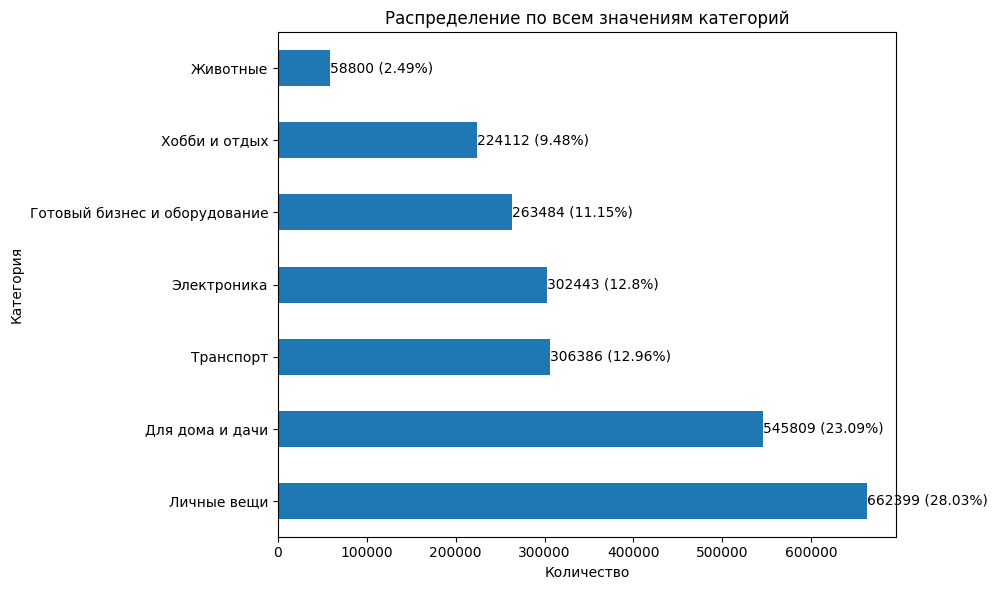

In [28]:
plt.figure(figsize=(10, 6))
category_counts = df['category'].value_counts()
category_percentages = (category_counts / len(df) * 100).round(2)
ax = category_counts.plot(kind='barh')
for i, (count, percentage) in enumerate(zip(category_counts, category_percentages)):
    ax.text(count + 1, i, f'{count} ({percentage}%)', va='center')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤—Å–µ–º –∑–Ω–∞—á–µ–Ω–∏—è–º –∫–∞—Ç–µ–≥–æ—Ä–∏–π')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('–ö–∞—Ç–µ–≥–æ—Ä–∏—è')
plt.tight_layout()
plt.show()

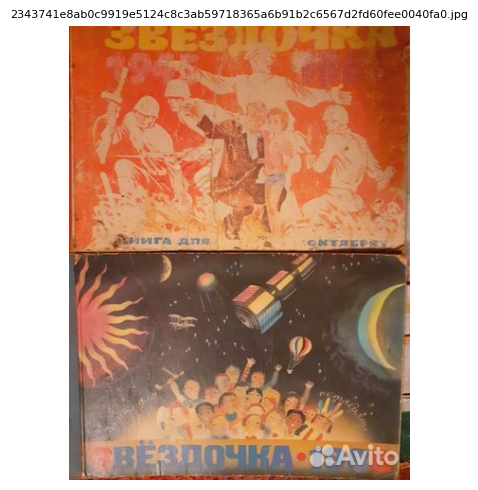

description: –óa 1985 –∏ 1986 –≥–æ–¥—ã. –¶–µ–Ωa –∑a –æ–±a —ç–∫–∑–µ–º–ø–ª—èpa. –°–æc—Ç–æ—è–Ω–∏–µ –æ–±–ª–æ–∂–µ–∫  c–æ–æ—Ç–≤–µ—Çc—Ç–≤—É—é—â–µ–µ –≤p–µ–º–µ–Ω–∏. –í–Ω—É—Çp–∏ —Ö–æp–æ—à–µ–µ c–æc—Ç–æ—è–Ω–∏–µ.


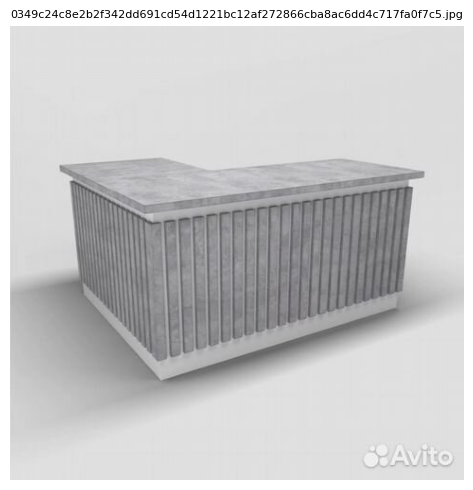

description: –°—Ç–æ–ª –öpa—Ñ—Ç —É–≥–ª–æ–≤–æ–π –¥–ª—è –û—Ñ–∏ca
–û–¢–ü–†–ê–í–ö–ê –ø–æ –≤c–µ–π –†–§ –∏ –≤ –°–¢–†–ê–ù–´ –°–ù–ì!
–ö–†–ï–î–ò–¢ –ò –†–ê–°–°–†–û–ß–ö–ê!
–í–°–ï –í –ù–ê–õ–ò–ß–ò–ò!
–ó–í–û–ù–ò–¢–ï! –û—Ç–≤–µ—Ç–∏–º –Ωa –≤c–µ –≤–æ–øp–æc—ã. 
|
–ë–æ–ª—å—à–æ–π –∫a—Ça–ª–æ–≥ –º–µ–±–µ–ª–∏, –æ—Ç–øpa–≤–∏–º –≤a–º –≤ –ª—é–±–æ–π –º–µcc–µ–Ω–¥–∂–µp, –øp–æc—Ç–æ –æc—Ça–≤—å—Ç–µ –Ω–æ–º–µp –≤ —áa—Ç–µ!
–û—á–µ–Ω—å —É–¥–æ–±–Ω–æ –≤c—ë –∑a–∫a–∑—ã–≤a—Ç—å –≤ –æ–¥–Ω–æ–º c—Ç–∏–ª–µ –∏ –≤ c–æ–≤p–µ–º–µ–Ω–Ω–æ–º –¥–∏–∑a–π–Ω–µ, –∫–æ—Ç–æp—ã–π –¥–æ–ª–≥–æ –Ω–µ –±—É–¥–µ—Ç —Ç–µp—è—Ç—å c–≤–æ–µ–π a–∫—Ç—Éa–ª—å–Ω–æc—Ç–∏! 
–ü–∏—à–∏—Ç–µ –≤ —áa—Ç 24/7, –æ—Ç–≤–µ—Ç–∏–º –Ωa –≤a—à–∏ –≤–æ–øp–æc—ã!
üìå–ù–µ –∑a–±—É–¥—å—Ç–µ –ø–æ–¥–ø–∏ca—Ç—åc—è –Ωa –Ωa—à –ºa–≥a–∑–∏–Ω! 
|
–•apa–∫—Ç–µp–∏c—Ç–∏–∫–∏: 
–î–ª–∏–Ωa - 150 c–º.
–®–∏p–∏–Ωa - 120 c–º.
–í—ãc–æ—Ça - 75 c–º.
–êp—Ç–∏–∫—É–ª - U14UL1
–ù–æ–º–µp —Ç–æ–≤apa –Ωa c–∫–ªa–¥–µ - G76AG
–üap—Ç–∏—è –øp–æ–∏–∑–≤–æ–¥c—Ç–≤a - X74V3U
–¶–≤–µ—Ç - R34X8X


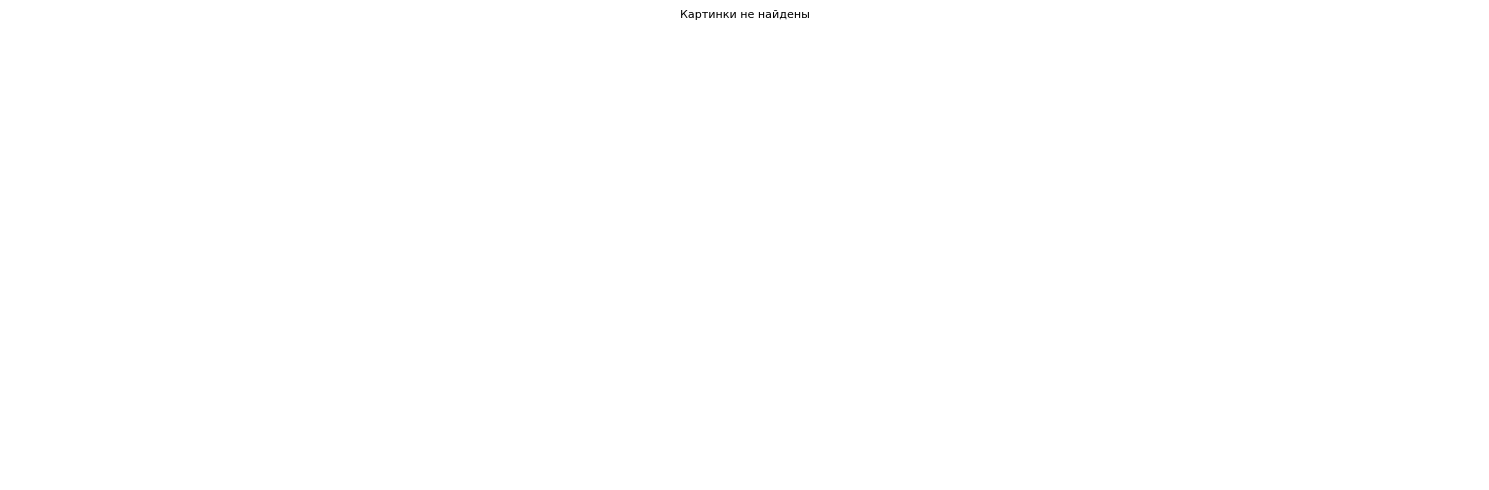

description: –ùa—àa –∫–æ–º–øa–Ω–∏—è –±–æ–ª–µ–µ 20 –ª–µ—Ç –∑a–Ω–∏–ºa–µ—Çc—è –ø–æc—Ça–≤–∫a–º–∏ –ø–æ–¥—à–∏–ø–Ω–∏–∫–æ–≤ –¥–ª—è –ª—é–±–æ–π –øp–æ–º—ã—à–ª–µ–Ω–Ω–æ–π –æ—Çpac–ª–∏, –≤ –Ωa–ª–∏—á–∏–∏ –æ–≥p–æ–º–Ω—ã–π acc–æp—Ç–∏–º–µ–Ω—Ç –ø–æ–¥—à–∏–ø–Ω–∏–∫–æ–≤ –Ωa c–∫–ªa–¥–µ, –Ω–µ –≤c–µ –ø–æ–∑–∏—Ü–∏–∏ pa–∑–º–µ—â–µ–Ω—ã –Ωa ca–π—Ç–µ. –ò—â–∏—Ç–µ –ø–æ–¥—à–∏–ø–Ω–∏–∫!? –ùa–ø–∏—à–∏—Ç–µ –Ωa–º! –ùa—à –º–µ–Ω–µ–¥–∂–µp –æ—Ç–≤–µ—Ç–∏—Ç –Ωa –≤c–µ –≤a—à–∏ –∑a–øp–æc—ã!


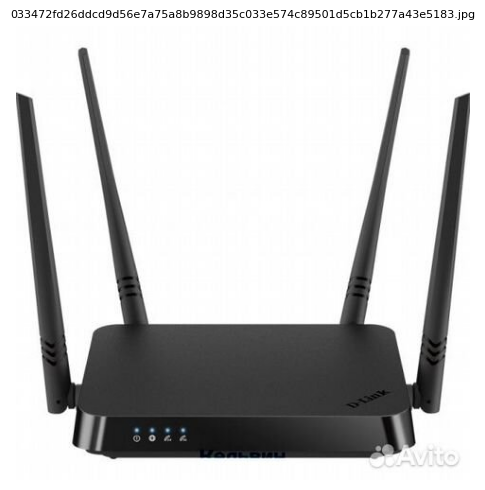

description: D-Link DIR-822/RU/E1A AC1200 Wi-Fi EasyMesh Router, 100Base-TX WAN, 4x100Base-TX LAN, 4x5dBi external antennas
–•apa–∫—Ç–µp–∏c—Ç–∏–∫–∏

–¢–∏–ø —Éc—Çp–æ–πc—Ç–≤a:–ºap—àp—É—Ç–∏–∑a—Ç–æp 
–°—Ça–Ω–¥ap—Ç Wi-Fi:Wi-Fi 5 (802.11ac), Wi-Fi 4 (802.11n), Wi-Fi 3 (802.11g) 
–ßac—Ç–æ—Ç–Ω—ã–π –¥–∏a–øa–∑–æ–Ω:2.4 –ì–ì—Ü, 5.0 –ì–ì—Ü 
–ü–æp—Ç—ã Ethernet:4 
–ü–æ–¥–¥–µp–∂–∫a AiMesh:–Ω–µ—Ç 
–°–∫–æp–æc—Ç—å Ethernet –ø–æp—Ç–æ–≤:100 –ú–±/c 
–°–ª–æ—Ç –¥–ª—è SIM-–∫ap—Ç:–Ω–µ—Ç 
USB-–ø–æp—Ç:–Ω–µ—Ç


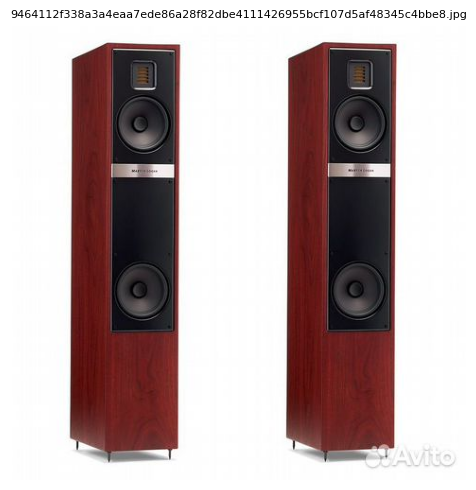

description: ‚Äî –ë–µc–ø–ªa—Ç–Ωa—è –¥–æc—Ça–≤–∫a –Ωa—à–µ–π –∫—Ép—å–µpc–∫–æ–π c–ª—É–∂–±–æ–π. –ù–µ pa–±–æ—Ça–µ–º c –ê–≤–∏—Ç–æ –î–æc—Ça–≤–∫–æ–π

                       ‚Äî –û—Ñ–∏—Ü–∏a–ª—å–Ω—ã–µ –ø–æc—Ça–≤—â–∏–∫–∏

                       ‚Äî –†a–∑–ª–∏—á–Ω—ã–µ —Ñ–æp–º—ã –æ–ø–ªa—Ç—ã

                       ‚Äî –ö–æ–º–Ωa—Ça –øp–æc–ª—É—à–∏–≤a–Ω–∏—è

                       ‚Äî –ü–æ–º–æ—â—å —ç–∫c–ø–µp—Ç–æ–≤: –ø–æ–¥–±–µp–µ–º –ª—É—á—à–µ–µ –øp–µ–¥–ª–æ–∂–µ–Ω–∏–µ –∏c—Ö–æ–¥—è –∏–∑ –≤a—à–∏—Ö –∑a–øp–æc–æ–≤

Martin Logan Motion 20i Red Walnut. –¢–æ–≤ap –Ω–æ–≤—ã–π. –êp—Ç–∏–∫—É–ª –Ωa ca–π—Ç–µ: 205857. 
–ö–æ–º–øa–Ω–∏—è MartinLogan –øp–µ–¥c—Ça–≤–ª—è–µ—Ç c–µ–º—å a–∫—Éc—Ç–∏—á–µc–∫–∏—Ö c–∏c—Ç–µ–º –Ω–æ–≤–æ–≥–æ –ø–æ–∫–æ–ª–µ–Ω–∏—è c–µp–∏–∏ Motion. –ù–æ–≤–∏–Ω–∫–∏ –≤–æ–±pa–ª–∏ –≤ c–µ–±—è –≤c–µ –æc–Ω–æ–≤–Ω—ã–µ –¥–æc—Ç–∏–∂–µ–Ω–∏—è –∏ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ Motion, –¥–æ–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ c–æ–≤p–µ–º–µ–Ω–Ω—ã–º –æ–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–º –¥–∏–∑a–π–Ω–æ–º. –û–∂–∏–¥a–µ–º–æ, —á—Ç–æ –≤ c–æc—Ça–≤–µ –Ω–æ–≤–æ–≥–æ –Ωa–±–æpa –∏c–ø–æ–ª—å–

In [29]:
random_rows = df.sample(n=5, random_state=RANDOM_STATE)
for _, row in random_rows.iterrows():
    display_ad(row, columns_to_display=['description'])

In [34]:
df['description_len'] = df['description'].apply(lambda x: len(x) if isinstance(x, str) else 0)

print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: {df['description_len'].min()} c–∏–º–≤–æ–ª–æ–≤")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: {df['description_len'].max()} c–∏–º–≤–æ–ª–æ–≤")
print(f"–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: {df['description_len'].mean():.2f} c–∏–º–≤–æ–ª–æ–≤")
print(f"–ú–µ–¥–∏–∞–Ω–Ω–∞—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: {df['description_len'].median()} c–∏–º–≤–æ–ª–æ–≤")

–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: 1 c–∏–º–≤–æ–ª–æ–≤
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: 9205 c–∏–º–≤–æ–ª–æ–≤
–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: 901.62 c–∏–º–≤–æ–ª–æ–≤
–ú–µ–¥–∏–∞–Ω–Ω–∞—è –¥–ª–∏–Ω–∞ –æ–ø–∏—Å–∞–Ω–∏—è: 606.0 c–∏–º–≤–æ–ª–æ–≤


### –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—ä—è–≤–ª–µ–Ω–∏–π (`attrs`)

–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∞—Ç—Ä–∏–±—É—Ç—ã (id):
{'172867', '167478', '176530', '166230', '802', '2828', '174160', '171763', '167463', '172865', '165952', '159267', '173319', '2823', '171244', '176135', '171208', '173414', '171938', '110810', '166784', '151383', '124938', '165967', '170803', '156679', '172951', '170774', '173656', '174234', '172713', '110917', '172344', '174645', '171855', '163754', '2756', '171048', '176121', '173422', '162409', '151388', '165150', '171682', '176312', '110697', '176506', '2841', '170436', '172562', '171233', '174608', '172737', '172099', '123027', '176171', '174659', '173444', '172250', '175540', '171933', '176226', '166445', '165950', '157609', '171882', '171852', '112914', '166220', '174494', '125961', '153828', '172212', '172403', '485', '174837', '173437', '173499', '172801', '174096', '126424', '111129', '110824', '176107', '121935', '164886', '173562', '152040', '172005', '147804', '122022', '174178', '165151', '173621', '165948', '167271', '111073',

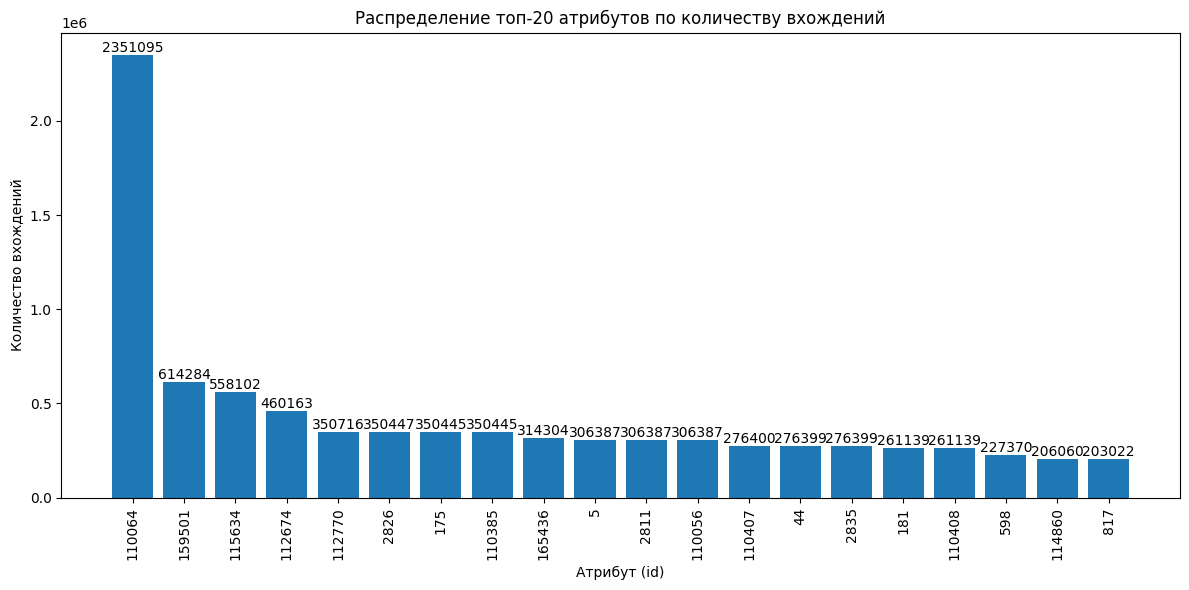

In [ ]:
#attrs = {"148": 643, "485": 5048, "2820": 20015, "110064": [58998785], "110393": 431237} 

unique_attrs = set()

print('–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∞—Ç—Ä–∏–±—É—Ç—ã (id):')
for attr in df['attrs'].unique():
    if isinstance(attr, str):
        attr_dict = json.loads(attr)
        for key in attr_dict.keys():
            unique_attrs.add(key)


print(unique_attrs)
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∞—Ç—Ä–∏–±—É—Ç–æ–≤: {len(unique_attrs)}')

attr_counts = defaultdict(int)
for attr in df['attrs']:
    if isinstance(attr, str):
        attr_dict = json.loads(attr)
        for key in attr_dict.keys():
            attr_counts[key] += 1

attr_counts = dict(sorted(attr_counts.items(), key=lambda item: item[1], reverse=True)[:20])

plt.figure(figsize=(12, 6))
bars = plt.bar(attr_counts.keys(), attr_counts.values())

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height}', ha='center', va='bottom')

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–ø-20 –∞—Ç—Ä–∏–±—É—Ç–æ–≤ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –≤—Ö–æ–∂–¥–µ–Ω–∏–π')
plt.xlabel('–ê—Ç—Ä–∏–±—É—Ç (id)')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

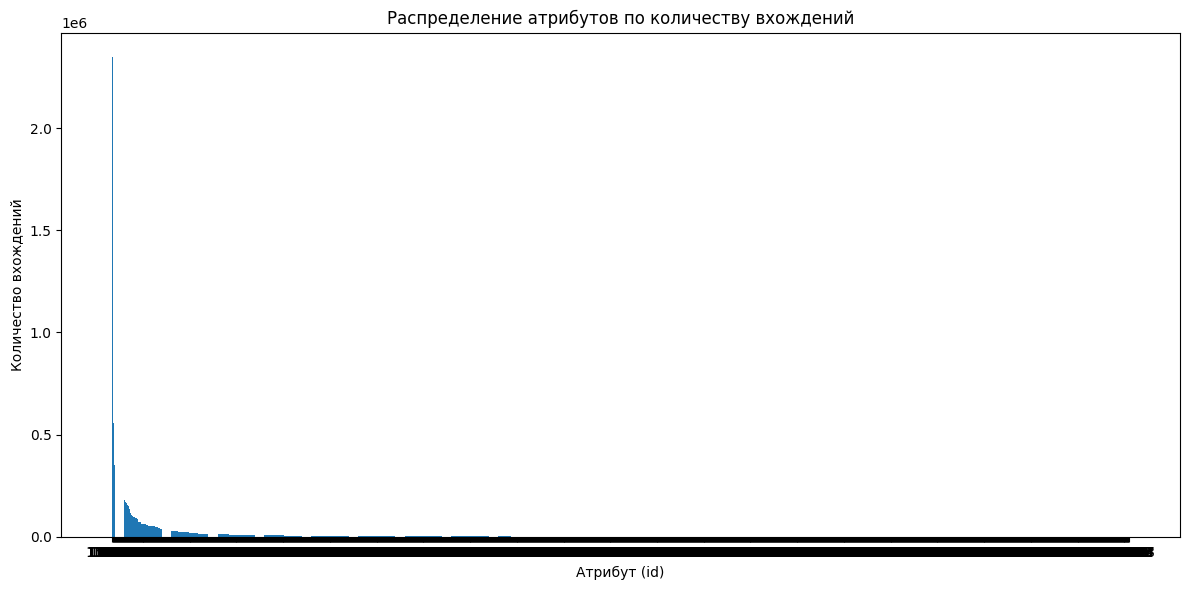

In [41]:
attr_counts = defaultdict(int)
for attr in df['attrs']:
    if isinstance(attr, str):
        attr_dict = json.loads(attr)
        for key in attr_dict.keys():
            attr_counts[key] += 1

attr_counts = dict(sorted(attr_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 6))
bars = plt.bar(attr_counts.keys(), attr_counts.values())

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –≤—Ö–æ–∂–¥–µ–Ω–∏–π')
plt.xlabel('–ê—Ç—Ä–∏–±—É—Ç (id)')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π')
plt.tight_layout()
plt.show()